In [61]:
%matplotlib inline
import numpy
from matplotlib import pyplot, rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Partie I - Nombres aléatoires


### Distribution exponentielle
La première distribution analysée est la distribution exponentielle. On la retrouve dans plusieurs phénomènes physiques, comme la désintégration d'un noyau instable. Mathématiquement, elle s'écrit 
$$
f(x)=
\begin{cases} 
    \alpha e^{-\alpha x} &\mbox{pour } x\geq 0 \\
    0 &\mbox{pour } x < 0
\end{cases} 
$$
avec le paramètre $\alpha > 0$. La fonction cumulative,
$$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{pour } x\geq 0 \\
0 &\mbox{pour } x < 0
\end{cases} 
$$
est inversible explicitement entre 0 et 1. Pour $X$ une variable aléatoire uniforme entre 0 et 1, $Y$ est une variable aléatoire suivant une loi exponentielle,
$$
Y = F^{-1}(X) = -\frac{1}{\alpha}\log(1-X).
$$

Cette méthode est comparée ici avec celle implémentée dans la librairie numpy.

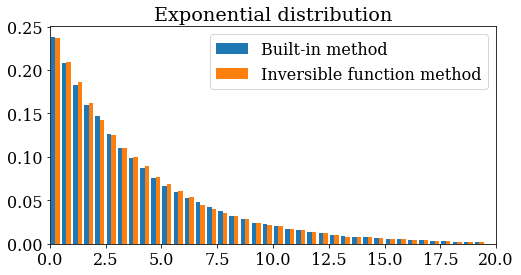

In [62]:
# Interval boundry
a=0
b=20

# Rate of the exponential distribution
alpha = 0.25 

# Number of iteration
nbr_iter=100000

nbr_aleatoire= numpy.zeros(nbr_iter)
binwidth=0.5
bins=numpy.arange(a,b, binwidth)

# Built-in method
for i in range(0,nbr_iter): 
    nbr_aleatoire[i]= numpy.random.exponential(1./alpha)

# Invesible function method   
x = numpy.random.random_sample(nbr_iter)
y = -1/alpha*numpy.log(1-x)

# Plots
pyplot.figure(1,figsize=(8,4))
pyplot.title(r'Exponential distribution')
pyplot.xlim(a,b)
pyplot.hist([nbr_aleatoire,y],bins,normed=True, label=['Built-in method','Inversible function method'])
pyplot.legend()

On remarque que les deux méthodes donnent, comme attendu, le même résultat. 

### Distribution normale - Méthode de réjection de von Neumann
Une autre distribution très courante est la distribution normale ou gaussienne. Dans ce cas, la fonction cumulative n'existe pas explicitement, donc son inverse non plus. C'est pourquoi la méthode proposée ci-dessus ne fonctionne pas. La méthode de von Neumann la remplace ici. Par simplicité, l'intervalle est réduit de l'ensemble des réels aux réels positifs

Pour générer une variable aléatoire normale suivant une distribution $f(x)$, deux variables sont utilisée. La première doit suivre une loi $g$ telle qu'il existe une constante $K$ afin que
$$
f(x) \leq Kg(x) \qquad \forall x
$$
L'algorithme sera plus efficace si $Kg(x)$ est au plus proche de $f(x)$. Ici, $g(x) = e^{-x}$ et $K = 1.4$. La seconde variable aléatoire $U$ suit une loi uniforme entre 0 et 1. Soit $X$ une variable aléatoire suivant $g$. Alors si $U < \frac{f(X)}{Kg(X)}$, l'événement est gardé et sinon il est rejeté. C'est pour cette raison que $Kg$ doit s'approcher un maximum de $f$.

Acceptance ratio: 71.385 %


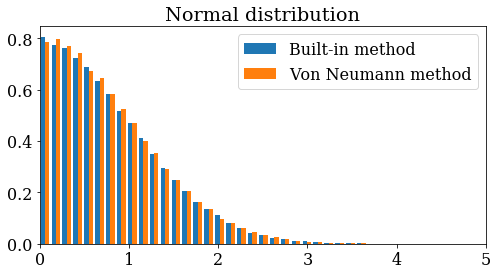

In [63]:
# Number of iteration (before acceptance)
nbr_iter = 100000
# Interval = [0,b]
b = 5.
# Number of bins
num_bins = 40

# Built-in version
x =  abs(numpy.random.randn(nbr_iter))

# Von Neumann rejection method
# Parameter for the exponential 
K = 1.4
# Empty list for the final set of numbers
h=[]
for i in range(nbr_iter):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    # Second number for acceptance
    u2 = numpy.random.random_sample()
    # Acceptance
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / (K*numpy.exp(-g))
    if (u2<ratio):
        h.append(g)

# Size of the accepted set
print('Acceptance ratio:', 100.*len(h)/(nbr_iter), '%')

# Histogram
pyplot.figure(2,figsize=(8,4))
pyplot.title(r'Normal distribution')
pyplot.xlim(0,b)
pyplot.hist([x,h],num_bins,normed=True, label=['Built-in method','Von Neumann method'])
pyplot.legend()

On voit ici une très bonne concordance entre la méthode de réjection de von Neumann et celle de la bibliothèque numpy.

### Distribution normale - Méthode de Box-Müller
Il existe plusieurs méthodes permettant de générer une variable aléatoire de distribution normale. Celle-ci en produit même deux. Pour $U_1$ et $U_2$ des variables aléatoires uniformes indépendantes entre 0 et 1, 
$$
X = \sqrt{-2\ln U_1}\cos(2\pi U_2)\\
Y = \sqrt{-2\ln U_1}\sin(2\pi U_2)
$$
sont des variables aléatoires normales indépendentes. Explications.

$X$ et $Y$ sont indépendentes et suivent une loi normale centrée réduite, elles ont donc une densité conjointe
$$
f(x,y) = \frac{1}{2\pi} \exp\left(-\frac{x^2+y^2}{2}\right).
$$
En passant en coordonnées polaires ($x = r\cos\theta$ et $y = r\sin\theta$),

\begin{align}
f(x,y)dxdy &= \frac{1}{2\pi} \exp\left(-\frac{x^2+y^2}{2}\right) dxdy  \nonumber \\
           &= \frac{r}{2\pi} \exp\left(-\frac{r^2}{2}\right) drd\theta \nonumber \\
           &= \frac{1}{4\pi} \exp\left(-\frac{s}{2}\right) dsd\theta \nonumber \\
           &= \tilde{f}(s,\theta)
\end{align}
la fonction de densité conjointe pour $s = r^2$ et $\theta$. On remarque alors que $s$ suit une loi exponentielle de paramètre $\frac{1}{2}$ et $\theta$ une uniforme sur $[0,2\pi)$]. Par conséquent, pour $U_1$ et $U_2$ deux variables uniformes entre 0 et 1, 
$$
R = \sqrt{-2\ln U_1} \nonumber \\
\Theta = 2\pi U_2.
$$
Alors $X = R\cos\Theta$ et $Y = R\sin\Theta$ sont des variables aléatoires indépendantes normales.

In [ ]:
# Number of iteration (before acceptance)
nbr_iter = 100000
# Interval = [0,b]
b = 5.
# Number of bins
num_bins = 40

u1 = numpy.random.random_sample(nbr_iteration)
u2 = numpy.random.random_sample(nbr_iteration)

# Box-Muller
z1 = abs(numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*numpy.pi*u2))
z2 = abs(numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*numpy.pi*u2))

# Built-in version
x =  abs(numpy.random.randn(N))

# Plots
pyplot.figure(3,figsize=(8,4))
pyplot.xlim(0,b)
pyplot.hist([x,z1],num_bins,normed=True, label=['Built-in method','Box-Müler method'])
pyplot.legend()



# Partie II - Mouvement brownien

Le mouvement brownien décrit le mouvement aléatoire d'une ou plusieurs particules qui interagissent avec les particules du milieu. Comme le nombre total de molécules est énorme, on ne peut pas s'intéresser aux positions et vitesses de chaque particule du milieu; on considère alors qu'à chaque instant la particule se déplace de manière aléatoire. On considère ici une particule se déplaçant à une dimension.

### Équations stochastiques
On définit $dx$ comme la variation de la position entre un temps $t$ et $t+dt$.
$$
dx=x(t+dt)−x(t)
$$
On considère d'abord que $dx$ est proportionnel à une loi normale $\cal{N(0,1)}$ de moyenne nulle et de variance unitaire, avec $\alpha$ le coefficient de diffusion
$$
dx = \sqrt{2 \alpha dt}\cal{N(0,1)}.
$$

Ce premier modèle est celui utilisé dans le mooc. Deux variantes sont proposée ici. La première ajoute une composante systématique, c'est à dire que tout le milieu se déplace avec une vitesse $c$. Cela peut être un colorant dans une rivière. Dans ce cas, l'équation différentielle stochastique devient
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}.
$$

Dans la seconde variante, on ajoute un terme de friction, avec $\gamma$ le coefficient de friction.
$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

### Ajout d'une composante systématique
Dans cette partie, on a 
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}.
$$
Donc, en discrétisant l'équation, à chaque pas de temps, la position évolue
$$
x_{i+1} = x_i + cdt+\sqrt{2\alpha dt}\cal{N(0,1)}.
$$

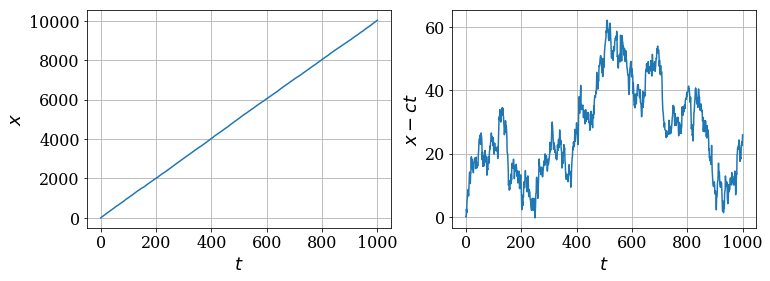

In [84]:
#Total simulation time and displacement constant
T=1000.0
c=10.

# Number of time steps and time interval
nt=1000
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration
for i in range(nt):
    x[i+1]=x[i]+ c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    
pyplot.figure(1,figsize=(12,4))

pyplot.subplot(121)
pyplot.plot(t, x)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x$', fontsize=18)
pyplot.grid(True)

pyplot.subplot(122)
pyplot.plot(t, x-c*t)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x - ct$', fontsize=18)
pyplot.grid(True)

Sur le graphe de gauche, la position semble augmenter de manière linéaire avec le temps car avec $c=10$, la contribution du courant est très supérieure au déplacement aléatoire de loi normale. On remarque, figure de droite, que la position varie de manière aléatoire autour de $ct$. Ce résultat est tout sauf étonnant, en effet, en se plaçant dans le référentiel ayant une vitesse $ct$ par rapport au premier, le courant est nul. On est donc dans le cas traité dans le mooc.


### Déduction de l'équation de la densité

On a pu voir sur les figures précédentes la superposition de la contribution de déplacement systématique, s'appliquant de la même manière à toutes les particules, à celle de contribution probabiliste par loi normale. 
Ainsi, en terme physique, la diffusion obéira à la même loi normale mais le centre le la gaussienne évoluera comme $x_0+ct$:

Soit l'équation de diffusion à une dimension:
$$
\frac{\partial\rho(x,t)}{\partial t}=\alpha\frac{\partial^2\rho(x,t)}{\partial^2 x}
$$
avec $\rho$ densité et $\alpha$ coefficient de diffusion.

On a une solution telle que
$$
\rho(x,t)=\frac{\rho_0}{\sqrt{4 \pi \alpha t}}\exp{\left(\frac{-(x-x_0)}{4\alpha t}\right)^2}
$$
avec $x_0$ valeur moyenne de la distribution gaussienne et $\sqrt{2 \alpha t}$ la variance.

Ainsi si l'on rajoute le terme $ct$ de translation du centre de la gaussienne on obtient
$$
\rho(x,t)=\frac{\rho_0}{\sqrt{4 \pi \alpha t}}\exp{\left(\frac{-(x-(x_0+ct))}{4\alpha t}\right)^2}. \quad \text{(1)}
$$  

Remarque: cette fonction de la densité peut être démontrée par l'établissement de l'équation d'advection diffusion en écoulement incompressible à une dimension spatiale
$$
\frac{\partial\rho(x,t)}{\partial t}+c\frac{\partial\rho(x,t)}{\partial x}-\alpha\frac{\partial^2\rho(x,t)}{\partial^2 x}=0\quad \text{(2)}
$$
avec $c$ vitesse d'advection.

La solution analytique de cette équation aux dérivées partielles est l'équation (1). Cette solution est établie par la méthode des fonctions de Green, la transformée de Laplace temporelle et/ou la transformée de Fourier spatiale. Cette preuve dépassant le spectre de ce travail nous ne l'avons pas détaillé ici.

Aussi conformément à l'équation (1) on a
$$
\rho(x,0)=\delta(x-x_0).
$$ 

Avec $x_0=0$. Une distribution de Dirac est cohérente avec les conditions initiales de la simulation (toutes les particules en $x=0$ pour $t=0$).
Cette condition satisfait bien l'équation (2).

### Ajout d'un terme de friction
Finalement, si on ajoute le terme de friction,  
$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}.
$$
Donc, en discrétisant l'équation, à chaque pas de temps, la position évolue
$$
x_{i+1} = x_i (1-\gamma dt) + \sqrt{2\alpha dt}\cal{N(0,1)}.
$$

In [82]:
def friction(T, gamma, nt, alpha):
    # Particle positions and initial condition
    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty(nt+1)
    x[0]=0
    for i in range(nt):
        x[i+1]=x[i]*(1-gamma*dt)+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    return t,x

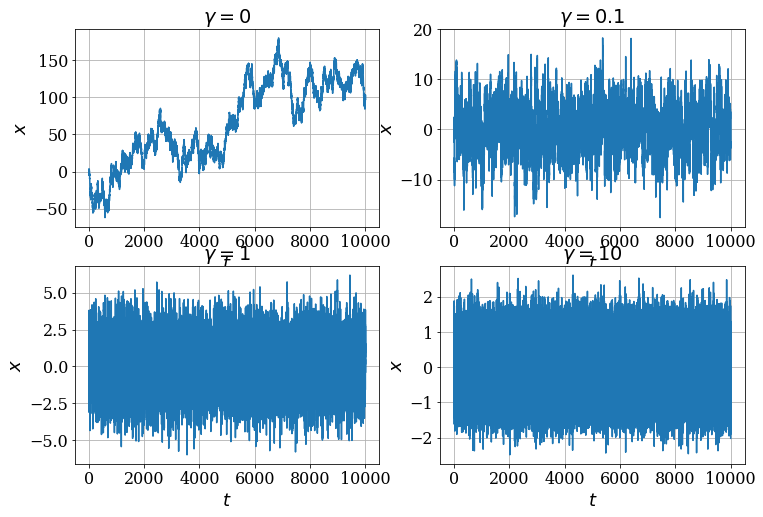

In [83]:
#Total simulation time
T=10000.0
# Number of time steps and time interval dt
nt=100000
dt=T/nt

# Diffusion coefficient
alpha=2.0

pyplot.figure(1,pyplot.figure(figsize=(12,8)))

t,x = friction(T,0., nt, alpha)
pyplot.subplot(221)
pyplot.plot(t,x)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x$', fontsize=18)
pyplot.grid(True)
pyplot.title(r'$\gamma = 0$')

t,x = friction(T,0.1, nt, alpha)
pyplot.subplot(222)
pyplot.plot(t,x)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x$', fontsize=18)
pyplot.grid(True)
pyplot.title(r'$\gamma = 0.1$')

t,x = friction(T,1., nt, alpha)
pyplot.subplot(223)
pyplot.plot(t,x)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x$', fontsize=18)
pyplot.grid(True)
pyplot.title(r'$\gamma = 1$')

t,x = friction(T,10., nt, alpha)
pyplot.subplot(224)
pyplot.plot(t,x)
pyplot.xlabel('$t$', fontsize=18)
pyplot.ylabel('$x$', fontsize=18)
pyplot.grid(True)
pyplot.title(r'$\gamma = 10$')

Les graphiques ci-dessus présentent l'évolution temporelle de la position pour différentes valeurs du coefficient de friction $\gamma$. Comme attendu, plus il est grand, moins la particule s'éloigne de sa position initiale. La position au temps $t+dt$ est de plus en plus indépendante de celle au temps $t$.



# Partie III - Modèle d'Ising
Ce modèle permet l'étude de la transition d'un matériau ferromagnétique. Ising propose de considérer un ensemble de petits dipôles disposés sur une grille en deux dimensions. Chaque dipôle peut pointer vers le haut ou vers le bas. On considère ici que chaque dipôle interagit avec ses quatre voisins les plus proches. L'énergie d'interaction de deux dipôles voisins est minimale lorsqu'ils pointent dans la même direction. L'énergie totale du système s'écrit
$$
E = -J\sum_{\text{paires }(i,j)}s_i s_j,
$$
avec $J>0$ la constante de couplage et $s_k$ le spin du $k$-ème dipôle. On voit alors que l'énergie est minimale lorsque tous les spins sont dans la même direction. Lors d'un changement de signe du spin, l'énergie varie de
$$
\Delta E = -Js_i\sum_{j\in n(i)} s_j,
$$
avec $n(i)$ l'ensemble des voisin du $i$-ème dipôle.

D'après la physique statistique, la probabilité d'un spin d'être dans un état $X$ est donnée par
$$
p(X) = \frac{\exp\left(-\frac{E_X}{k_BT}\right)}{Z}
$$
avec $k_B$ la constante de Boltzmann, $T$ la température, $Z$ la constante de normalisation et $E_X$ l'énergie de l'état $X$.

La magnétisation d'un état $X$ est donnée par 
$$
M_X=\sum_{i=1}^N s_i,
$$
alors les moyennes de la magnétisation et de l'énergie valent 
$$
<M> = \frac{\sum_X M_X e^{-\beta E_X}}{Z} \nonumber \\
<E> = \frac{\sum_X E_X e^{-\beta E_X}}{Z} \nonumber
$$
Pour une grille de $100\times100$ le nombre d'état vaut $2^{10000} \approx 2\cdot10^{3010}$, beaucoup trop grand pour pouvoir calculer chaque état et moyenner. C'est pourquoi on utilise une méthode stochastique.

## Algorithme de Metropolis
Pour un état initial, à chaque pas de temps, pour chaque spin, on évalue la variation d'énergie. Si celle-ci est négative, le spin change de sens, alors que si elle est positive, le signe change avec probabilité
$$
p = exp\left(-\frac{\Delta E}{k_B T}\right).
$$
On répète l'opération jusqu'à obtenir une statistique suffisante et la moyenne arithmétique sera utilisée pour évaluer $<M>$ et $<E>$. On peut montrer que les états générés par cet algorithme suivent la densité exprimée ci-dessus lorsque l'opération est suffisamment répétée.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot, rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [3]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Testons déjà l'algorithme. À l'aide des conditions initiales données avec les énoncés, le rapport du nombre de spins *ups* sur le nombre de spin *downs* est presque constant.

In [54]:
# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1
NMC = 100000 
n_iter = 100
upsdowns = numpy.zeros(n_iter)
for i in range(0,n_iter):
    # Initial spins at each site
    sp = numpy.load('initial_state.npy')
    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[5,5]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    upsdowns[i] =ups/downs

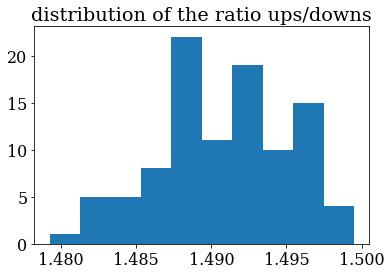

In [56]:
pyplot.figure
pyplot.hist(upsdowns)
pyplot.title(r'distribution of the ratio ups/downs')

Avec une moyenne sur 100'000 états, on voit que la distribution est très groupée, centrée autour de $1.49$. 

In [69]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.random_integers(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [70]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

L'algorithme peut maintenant être testé. On prend une grille de $100\times100$ et une statistique de $100$. Les conditions initiales sont des spins $1$ partout. Afin que les conditions initiales n'influencent pas les résultats, on n'utilisera pas les premières valeurs de la magnétisation pour calculer la moyenne. On choisit ici les 70 derniers pourcents. 

In [30]:
NMC=100   # statistic
nx = 100  # number of points in axis x
ny = 100  # number of points in axis y
ratio_NMC_points=0.7 # ratio for the computing of the average
NMC_mag=round(NMC*ratio_NMC_points)
NMC_mag_start=NMC-NMC_mag 
sp = numpy.ones([nx,ny])  # initial spins

In [31]:
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)
mag=numpy.sum(states_0_7[NMC_mag_start:])/(NMC_mag) 
print(r"$\alpha$ =",alpha,"; Magnetization =",mag)

$\alpha$ = 0.7 ; Magnetization = 10046.7428571


In [32]:
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)
mag=numpy.sum(states_0_2[NMC_mag_start:])/(NMC_mag) 
print(r"$\alpha$ =",alpha,"; Magnetization =",mag)

$\alpha$ = 0.2 ; Magnetization = 16.8571428571


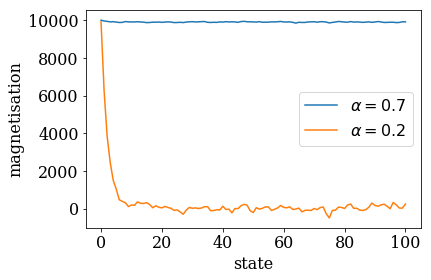

In [33]:
pyplot.figure()
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.legend()
pyplot.xlabel(r"state")
pyplot.ylabel(r"magnetisation")

Tout d'abord, pour deux valeurs de $\alpha$ différentes, on observe un comportement très différent. Pour $\alpha = 0.7$, la magnétisation reste constante vers $10000$, alors qu'elle chute rapidement vers $0$ dans le cas où $\alpha = 0.2$. Dans le premier cas le matériau est ferromagnétique, alors qu'il ne l'est pas dans le second. Il y a donc transition de phase entre les deux. Il s'agit donc de trouver le $\alpha$ pour lequel la transition a lieu.

In [43]:
# statistic
NMC=150
# number of points in axis x
nx = 100
# number of points in axis y
ny = 100
# number of alpha tested
nb_inter_alpha=15
# alpha in [alpha_start, alpha_stop)
alpha_start=0.
alpha_stop= 1.
# ratio for the computing of the average
ratio_NMC_points=0.7
NMC_average=round(NMC*ratio_NMC_points)
NMC_average_start=NMC-NMC_average


alpha_list=numpy.zeros(nb_inter_alpha)
average_list=numpy.zeros(nb_inter_alpha)


for i in range(1,nb_inter_alpha):
    average=0.
    sp = numpy.ones([nx,ny])
    alpha1= alpha_start+i*(alpha_stop-alpha_start)/nb_inter_alpha
    states = ising_model_metropolis(sp, NMC, nx, ny, alpha1)
    average=numpy.sum(states[NMC_average_start:])/(NMC_average) 
    alpha_list[i]=alpha1
    average_list[i]=average

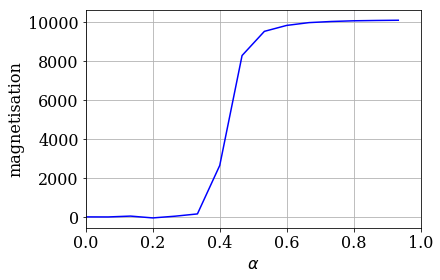

In [68]:
pyplot.xlim(alpha_start,alpha_stop)
pyplot.plot(alpha_list,average_list,label=r'average',color='blue')
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'magnetisation')
pyplot.grid(True)

On voit sur ce graphique que la magnétisation observe une très grande variation entre $\alpha = 0.35$ et $0.5$. Au-dessus, le matériau est ferromagnétique et ne l'est pas au-dessous. La solution exacte d'Onsager vaut $\alpha = 0.44$ qui tombe dans l'intervalle.

Changeons maintenant les conditions initiales. Les $n$ rangées de spin les plus proches du bord sont forcées à $+1$ ou $-1$, le reste est initialisé de manière aléatoire. On s'intéresse à deux cas. Le premier laisse les conditions aux bords inchangées dans le temps, par exemple les spins sont contraints à s'aligner sous l'effet d'un champ magnétique externe. Le second laisse les spins se mettre à l'équilibre. Il s'agit ici que d'une condition initiale, le champs les ayant alignés étant éteint. On cherche une relation semblable dans ces nouveaux cas.

Les fonctions sont donc légèrement modifiées dans ce but.

In [58]:
def metropolis_at_site_bc(sp,alpha,ix,iy,calc_boundary,nbr_lines_boundary,spin_boundary):
    """ Flips a dipole at site ix, iy when probability condition is met according to boundary/initial condition
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    calc_boundary : bool
        True if initial condition can evoluate
    nbr_lines_boundary: int
        Number of lines concerned by the boundary condition
    spin_boundary : int (+- 1)
        Boundary spin
        
    """
    
    
    if calc_boundary==0 and (ix<=nbr_lines_boundary or ix>= nx-nbr_lines_boundary or iy<=nbr_lines_boundary or iy>= ny-nbr_lines_boundary):
        sp[ix,iy]= spin_boundary
    else:
        sigma=sp[ix,iy]
        energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
        sigma = -sigma
        energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
        # Flip the site with Metropolis probability
        # Condition is always satisifed if dE < 0
        if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped-energy_before_flip))):
            sp[ix,iy]=-sp[ix,iy]

In [12]:
def initial_state_boundary(nx,ny,nbr_lines_boundary,spin_boundary):
    """ Creates a lattice with boundary/initial condition and random spin orientations inside.
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    nbr_lines_boundary: int
        Number of lines concerned by the boundry condition
    spin_boundary : int (+- 1)
        Boundary spin
        
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1
    
    for i in range(0, nbr_lines_boundary):
        for j in range(0,ny):
                r[i,j]=spin_boundary
                
    for i in range(nx-nbr_lines_boundary, nx):
        for j in range(0,ny):
                r[i,j]=spin_boundary           

    for j in range(0, nbr_lines_boundary):
        for i in range(0,nx):
                r[i,j]=spin_boundary
                
    for j in range(ny-nbr_lines_boundary, ny):
        for i in range(0,nx):
                r[i,j]=spin_boundary 
    return r

In [10]:
def ising_model_metropolis_bc(sp, NMC, nx, ny, alpha,calc_boundary,nbr_lines_boundary,spin_boundary):
    """ Creates a sequence of states with boundry/initial condition for the Ising model using
    the Metropolis algorithm 
   
    Parameters:
    ----------
    sp   :  numpy array
        array of spins
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    calc_boundary : bool
        True if initial condition can evoluate
    nbr_lines_boundary: int
        Number of lines concerned by the boundary condition
    spin_boundary : int (+- 1)
        Boundary spin
        
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site_bc(sp,alpha,ix,iy,calc_boundary,nbr_lines_boundary,spin_boundary)
        states[i]=sp.copy()
    return states

Cette nouvelle fonction *calc_magnetisation* permet de connaître la magnétisation en fonction de la constante de couplage $\alpha$.

In [45]:
def calc_magnetisation(sp1,nx,ny,NMC,nb_inter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary):
    """ Compute the magnetisation of the gride 
   
    Parameters:
    ----------
    sp1  :  numpy array
        array of spins
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    nb_inter_alpha : int
        number of values for alpha (coupling constant J/(kb*T))
    alpha_start : real
        minimal value for alpha
    alpha_stop : real
        maximal value for alpha
    ratio_NMC_points : real
        proportion of computed magnetisation used for everage
    calc_boundary : bool
        True if initial condition can evoluate
    nbr_lines_boundary: int
        Number of lines concerned by the boundary condition
    spin_boundary : int (+- 1)
        Boundary spin
        
    Returns:
    -------
    alpha_list : numpy array
        list of coupling constant
    mag_list   : numpy array
        list of magnetisation
    """
    mag=0.
    increment=0
    i_nx=0
    j_ny=0
    NMC_mag=round(NMC*ratio_NMC_points)
    NMC_mag_start=NMC-NMC_mag
    
    
    alpha_list=numpy.zeros(nb_inter_alpha)
    mag_list=numpy.zeros(nb_inter_alpha)

    for i in range(1,nb_inter_alpha):
        mag=0.
        total=0.
        alpha1= alpha_start+i*(alpha_stop-alpha_start)/nb_inter_alpha
        sp = sp1.copy()
        states = ising_model_metropolis_bc(sp, NMC, nx, ny, alpha1,calc_boundary,nbr_lines_boundary,spin_boundary)
        # calcul de la moyenne
        mag=numpy.sum(states[NMC_mag_start:])/(NMC_mag) 
        
        alpha_list[i]=alpha1
        mag_list[i]=mag
    return alpha_list,mag_list

In [74]:
NMC=100
nx = 100
ny = 100
nb_iter_alpha=30
alpha_start=0.
alpha_stop= 1
ratio_NMC_points=0.7

'''
# Bool: if 1 the boundary are computed
calc_boundary=0
# width of the boundary
nbr_lines_boundary=20
# spin of the boundary
spin_boundary=+1
'''

#initialisation spin a +1
calc_boundary=0
sp1 = numpy.ones([nx,ny])   
alpha_list1,mag_list1=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)

#initialisation spin aleatoire
calc_boundary=0
sp1 = initial_state_boundary(nx,ny,0,1)
#sp1 = initial_state(nx,ny)
alpha_list2,mag_list2=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)

#initialisation spin à 1 sur 20 lignes de bord
calc_boundary=0
nbr_lines_boundary=20
spin_boundary=+1
sp1 = initial_state_boundary(nx,ny,nbr_lines_boundary,spin_boundary)
alpha_list3,mag_list3=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)

#initialisation spin à 1 sur 1 lignes de bord et gardées fixe durant l'algo d'ising
calc_boundary=1
nbr_lines_boundary=1
spin_boundary=1
sp1 = initial_state_boundary(nx,ny,nbr_lines_boundary,spin_boundary)
alpha_list4,mag_list4=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)

#initialisation spin à 1 sur 30 lignes de bord et gardées fixe durant l'algo d'ising
calc_boundary=1
nbr_lines_boundary=30
spin_boundary=+1
sp1 = initial_state_boundary(nx,ny,nbr_lines_boundary,spin_boundary)
alpha_list5,mag_list5=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)

#initialisation spin à 1 sur 30 lignes de bord et gardées fixe durant l'algo d'ising
calc_boundary=1
nbr_lines_boundary=1
spin_boundary=-1
sp1 = initial_state_boundary(nx,ny,nbr_lines_boundary,spin_boundary)
alpha_list6,mag_list6=calc_magnetisation(sp1,NMC,nx,ny,nb_iter_alpha,alpha_start,alpha_stop,ratio_NMC_points,calc_boundary,nbr_lines_boundary,spin_boundary)


0

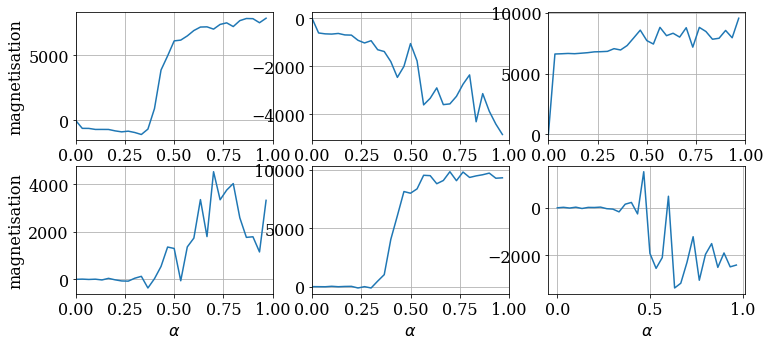

In [75]:
pyplot.figure(1,figsize=(12,8))

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(331)
pyplot.plot(alpha_list1, mag_list1)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'magnetisation')

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(332)
pyplot.plot(alpha_list2, mag_list2)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
#pyplot.ylabel(r'magnetisation')

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(333)
pyplot.plot(alpha_list3, mag_list3)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
#pyplot.ylabel(r'magnetisation')

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(334)
pyplot.plot(alpha_list4, mag_list4)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'magnetisation')

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(335)
pyplot.plot(alpha_list5, mag_list5)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
#pyplot.ylabel(r'magnetisation')

pyplot.xlim(alpha_start,alpha_stop)
pyplot.subplot(336)
pyplot.plot(alpha_list6, mag_list6)
pyplot.grid(True)
pyplot.xlabel(r'$\alpha$')
#pyplot.ylabel(r'magnetisation')

Six configurations sont analysées. L'épaisseur de bord est définie comme le nombre de rangées concernées par les conditions au bord. Pour la première moitié des simulations (première ligne), les conditions aux bords sont forcées durant toute la durée du calcul. Dans la première simulation, l'épaisseur de bord vaut 50, c'est à dire que tout les spins sont initialisés à la même valeur, $1$. Dans le second cas, l'épaisseur de bord est nulle et dans le troisième, elle vaut $20$.

Dans la seconde partie, les conditions ne sont que des conditions initiales et les spins du bord évoluent durant la simulation, avec des épaisseurs valant $1$, $30$ et $1$ et les spins au bord $+1$, $+1$ et $-1$.

Sur les premier graphique, sans épaisseur, on a bien un changement de phase vers $\alpha = 0.4$. Pour le second, la magnétisation diminue fortement, ce qui est étonnant puisque le système est dans un état parfaitement libre. La troisième montre un amtériaux toujours ferromagnétique, quelle que soit la valeur de $\alpha$. 

Lorsque les bords sont laissés libres dès le début de la simulation, on remarque d'abord une évolution symétrique lorsque les spins initiaux valent $+1$ ou a $-1$, mais la transition n'est pas régulière. Pour celle du millieu, on observe une belle transition de phase vers $0.4$.